In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Scatter
This script takes a 2-bands raster and plots its pixels as a scatter plots. This was only useful to realise that it's mostly impossible to guess the value of a pixel in the second band (population) from just the value of the same single pixel in the first band (nightlights).

Here's the expected result for Brazil in 2015 :
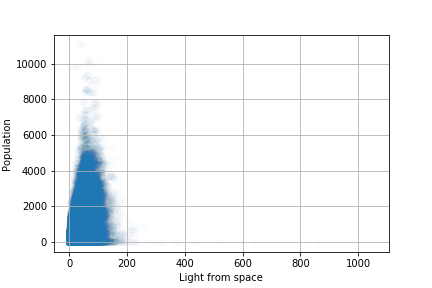

In [10]:
## PARAMETERS ##
logscale = False # might need too much free memory if using a big raster
source = '../data/lightpop_merged/adj_2015_brazil.tif'
oputput_name = '2015_brazil'
################

valuesX = []
valuesY = []

raster = rasterio.open(source)
valuesX = raster.read(1)
valuesY = raster.read(2)
    
fig = plt.figure()
ax1 = plt.subplot(1, 1, 1)

if logscale:
    plt.xscale('log')
    plt.yscale('log')
ax1.scatter(valuesX, valuesY, alpha=0.01)
ax1.set(xlabel='Light from space', ylabel='Population')
ax1.grid()

if logscale:
    fig.savefig("scatters/" + oputput_name + "_logscale.png")
else:
    fig.savefig("scatters/" + oputput_name + ".png")

valuesX, valuesY = None, None
raster.close()
plt.close(fig)

print('plots done !')


plots done !


# Diff
This script computes the pixel-by-pixel difference between two rasters (dataset2 minus dataset1) and saves the result in a new raster (out). The input rasters must have the same boundaries.

In [30]:
## PARAMETERS ##
dataset1 = '../data/lightrasters_noaa/2013_colombia.tif'
band1 = 1

dataset2 = '../data/lightrasters_noaa/2017_colombia.tif'
band2 = 1

out = '2013-2017_colombia.tif'
################

print('opening rasters')

raster1 = rasterio.open(dataset1)
raster2 = rasterio.open(dataset2)

print('generating raster')

raster3 = raster2.read(band2) - raster1.read(band1)

profile = raster1.profile
profile.update(count=1)

with rasterio.open('diffs' + out, 'w', **profile) as dst:
    dst.write(raster3.astype(rasterio.float32), 1)
raster1.close()
raster2.close()
raster3 = None
print('done !')


opening rasters
generating raster
Pearson correlation : [[1.        0.8589399]
 [0.8589399 1.       ]]
done !


# Stats
This script computes the Pearson correlation coefficient between two rasters, as well as a few helpful statistics to compare a prediction with a validation dataset or another prediction, pixel by pixel.

The input rasters must have the same boundaries.

In [8]:
## PARAMETERS ##
dataset1 = '../data/lightpop_merged/adj_2015_brazil.tif'
band1 = 2

dataset2 = '../gleam/predictions/2015_brazil_to_2017_brazil.tif'
band2 = 1
################

print('opening rasters')

raster1 = rasterio.open(dataset1)
raster2 = rasterio.open(dataset2)

sum1 = np.sum(raster1.read(band1))
sum2 = np.sum(raster2.read(band2))

print('Pearson correlation : ' + str(np.corrcoef(raster1.read(band1).flatten(), raster2.read(band2).flatten())[0, 1]))
print('Sum of values : ' + str(sum1) + ', ' + str(sum2))
print('Sum increase : ' + str(sum2 - sum1) + ' (' + str(100*(sum2 - sum1)/sum1) + ' %)')

raster1.close()
raster2.close()
print('done !')

opening rasters
Pearson correlation : 0.7499682639089719
Sum of values : 204777100.0, 272478200.0
Sum increase : 67701100.0 (33.060875790098095 %)
done !
